In [2]:
from rdkit import Chem
import pandas as pd
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')                                                                                                 

comm_sig = pd.read_excel("sigma_compiled_sanitized_20230108.xlsx")


In [3]:
sub = Chem.MolFromSmarts("[c][Br:3]")


all_bromides = []
for i,k in comm_sig.iterrows():
    mol = Chem.MolFromSmiles(k["sanitized_smiles"])
    

    if mol.HasSubstructMatch(sub):
        if k["sanitized_smiles"] not in all_bromides:
            all_bromides.append(k["sanitized_smiles"])
print(len(all_bromides))

[07:42:50] WARNING: not removing hydrogen atom without neighbors
[07:42:50] WARNING: not removing hydrogen atom without neighbors
[07:42:53] WARNING: not removing hydrogen atom without neighbors
[07:42:54] WARNING: not removing hydrogen atom without neighbors
[07:42:55] WARNING: not removing hydrogen atom without neighbors
[07:42:55] WARNING: not removing hydrogen atom without neighbors
[07:42:57] WARNING: not removing hydrogen atom without neighbors
[07:42:58] WARNING: not removing hydrogen atom without neighbors
[07:42:58] WARNING: not removing hydrogen atom without neighbors
[07:43:00] WARNING: not removing hydrogen atom without neighbors
[07:43:00] WARNING: not removing hydrogen atom without neighbors
[07:43:00] WARNING: not removing hydrogen atom without neighbors
[07:43:00] WARNING: not removing hydrogen atom without neighbors
[07:43:00] WARNING: not removing hydrogen atom without neighbors
[07:43:01] WARNING: not removing hydrogen atom without neighbors
[07:43:01] WARNING: not r

43425


[07:43:24] WARNING: not removing hydrogen atom without neighbors


In [4]:
from rdkit.Chem import AllChem

all_products = []

half = Chem.MolFromSmiles("CN(C)C1CCCCC1")

rxn = AllChem.ReactionFromSmarts("[CH3:1][N:2]([C:3]).[c:4][Br]>>[c:4][C:1][N:2]([C:3])")





In [5]:
for k in all_bromides[0:1000]:
    o = rxn.RunReactants((half, Chem.MolFromSmiles(k)))
    for j in o:
        sm = Chem.MolToSmiles(j[0])
        if sm not in all_products:
            all_products.append(sm)

In [6]:
print(len(all_products))

1141


In [7]:
from rdkit.Chem import Crippen
from rdkit.Chem import QED
from rdkit.Chem import Descriptors

amine_logps = []

amine_mw = []


amine_qed = []


for i,k in enumerate(all_products):
    mol = Chem.MolFromSmiles(k)
    
    mw = Chem.Descriptors.MolWt(mol)
    logp = Chem.Crippen.MolLogP(mol)
    qed = QED.qed(mol)

    amine_logps.append(logp)
    amine_mw.append(mw)
    amine_qed.append(qed)


-0.7364000000000008 15.102099999999965


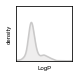

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

def plot_kde(data, filename):
    
    fig, ax = plt.subplots(figsize=(1,1))
    print(np.min(data), np.max(data))
    kernel = gaussian_kde(data)
    x = np.linspace(min(data), max(data), 1000)
    density = kernel(x)

    ax.plot(x, density, color="#cac9c9")
    ax.fill_between(x, 0, density, alpha=0.3, color="#cac9c9")  # Fill area below the curve
    ax.set_xlabel('LogP', fontsize=6, fontfamily='arial')
    ax.set_ylabel('density', fontsize=6, fontfamily='arial')
    # plt.title('KDE Plot')
    ax.set_xticks([])
    # ax.set_xticks([0, 500, 1000])
    # ax.set_xticklabels([0, 500, 1000], fontsize=6, fontfamily='arial')
    ax.set_ylim([0,.5])
    ax.set_xlim([np.min(data),np.max(data)])

    ax.set_yticks([])

    plt.subplots_adjust(hspace=0, wspace=0)
    plt.margins(0,0)

    plt.savefig(f"{filename}.png", dpi=900, bbox_inches='tight', pad_inches = 0)
    
# Example usage
float_list = [1.2, 2.5, 3.7, 2.8, 1.9, 3.1, 4.5, 2.3]

plot_kde(amine_logps, "logp")


193.2899999999999 789.2709999999996


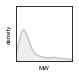

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

def plot_kde(data, filename):
    
    fig, ax = plt.subplots(figsize=(1,1))
    print(np.min(data), np.max(data))
    kernel = gaussian_kde(data)
    x = np.linspace(min(data), max(data), 1000)
    density = kernel(x)

    ax.plot(x, density, color="#cac9c9")
    ax.fill_between(x, 0, density, alpha=0.3, color="#cac9c9")  # Fill area below the curve
    ax.set_xlabel('MW', fontsize=6, fontfamily='arial')
    ax.set_ylabel('density', fontsize=6, fontfamily='arial')
    # plt.title('KDE Plot')
    ax.set_xticks([])
    # ax.set_xticks([0, 500, 1000])
    # ax.set_xticklabels([0, 500, 1000], fontsize=6, fontfamily='arial')
    ax.set_ylim([0,.01])
    ax.set_xlim([np.min(data),np.max(data)])

    ax.set_yticks([])

    plt.subplots_adjust(hspace=0, wspace=0)
    plt.margins(0,0)

    plt.savefig(f"{filename}.png", dpi=900, bbox_inches='tight', pad_inches = 0)
    
# Example usage
float_list = [1.2, 2.5, 3.7, 2.8, 1.9, 3.1, 4.5, 2.3]

plot_kde(amine_mw, "mw")


0.09293445264755829 0.9403565348181874


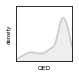

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

def plot_kde(data, filename):
    
    fig, ax = plt.subplots(figsize=(1,1))
    print(np.min(data), np.max(data))
    kernel = gaussian_kde(data)
    x = np.linspace(min(data), max(data), 1000)
    density = kernel(x)

    ax.plot(x, density, color="#cac9c9")
    ax.fill_between(x, 0, density, alpha=0.3, color="#cac9c9")  # Fill area below the curve
    ax.set_xlabel('QED', fontsize=6, fontfamily='arial')
    ax.set_ylabel('density', fontsize=6, fontfamily='arial')
    # plt.title('KDE Plot')
    ax.set_xticks([])
    # ax.set_xticks([0, 500, 1000])
    # ax.set_xticklabels([0, 500, 1000], fontsize=6, fontfamily='arial')
    ax.set_ylim([0,4])
    ax.set_xlim([np.min(data),np.max(data)])

    ax.set_yticks([])

    plt.subplots_adjust(hspace=0, wspace=0)
    plt.margins(0,0)

    plt.savefig(f"{filename}.png", dpi=900, bbox_inches='tight', pad_inches = 0)
    
# Example usage
float_list = [1.2, 2.5, 3.7, 2.8, 1.9, 3.1, 4.5, 2.3]

plot_kde(amine_qed, "qed")


In [28]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem, MACCSkeys
from rdkit import RDLogger
import matplotlib.pyplot as plt
RDLogger.DisableLog('rdApp.*')        


fps = []
colors = []
for i,k in enumerate(all_products):

    mol = Chem.MolFromSmiles(k)
    fp = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(mol, 4), fp)
    fps.append(fp)
    colors.append(amine_qed[i])

/opt/homebrew/Caskroom/miniforge/base/envs/sklearn-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/sklearn-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


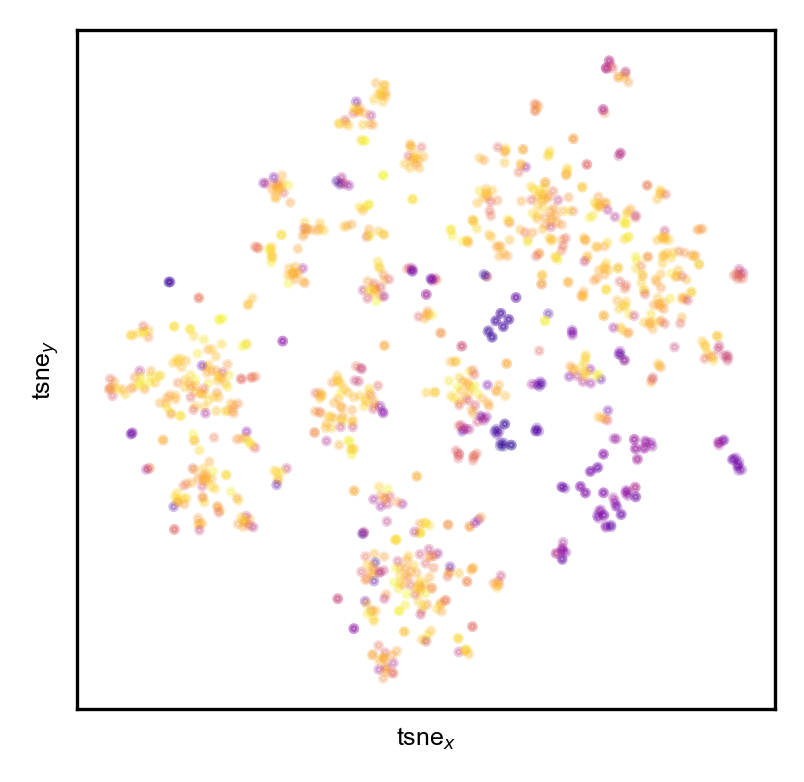

In [29]:
from sklearn.manifold import TSNE

X_TSNE_RFP = TSNE(n_components=2, n_jobs=-1, perplexity=10, random_state=1).fit_transform(fps)

fig, ax = plt.subplots(figsize=(3,3), dpi=300)
ax.scatter(X_TSNE_RFP[:,0], X_TSNE_RFP[:,1], cmap='plasma', c=colors, alpha=.25, marker='.',s=10)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("tsne$_x$", fontsize=6, fontfamily="arial")
ax.set_ylabel("tsne$_y$", fontsize=6, fontfamily="arial")

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('tsneA.png', dpi=300, bbox_inches='tight',pad_inches=0.01)